In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle datasets download gregorut/videogamesales
! unzip videogamesales.csv

401 - Unauthorized
unzip:  cannot find or open videogamesales.csv, videogamesales.csv.zip or videogamesales.csv.ZIP.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

game_data = pd.read_csv('vgsales.csv')

game_data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
#shows null values
game_data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
#Drops Null Values
game_data.dropna(subset=["Publisher"], inplace=True)
game_data["Year"].fillna(game_data["Year"].median(), inplace=True)
game_data["Year"] = game_data["Year"].astype("int64")

Text(0, 0.5, 'Sales')

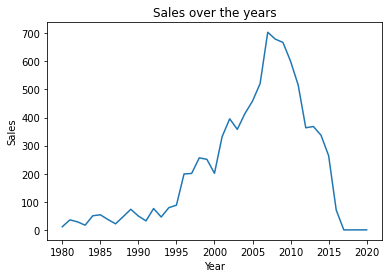

In [ ]:
#Graph visualization of yearly sales.
import seaborn as sns
import matplotlib.pyplot as plt
sale_by_year = game_data.groupby('Year')['Global_Sales'].sum()
sns.lineplot(y=sale_by_year,x=sale_by_year.index)
plt.title("Sales over the years")
plt.ylabel("Sales")

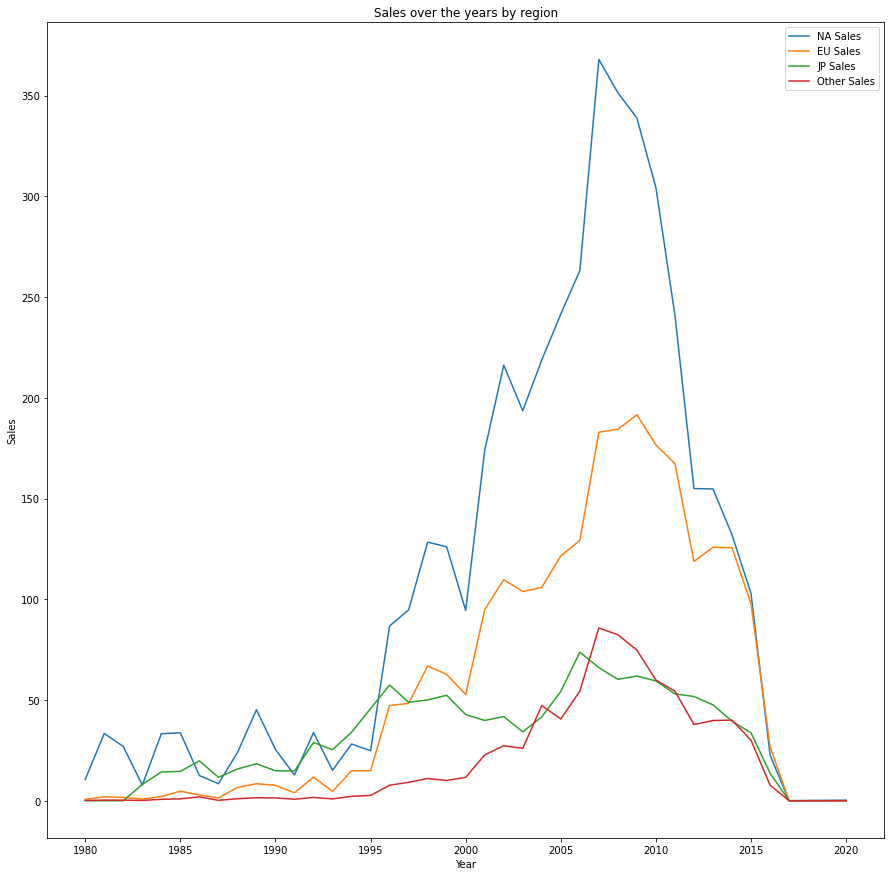

In [ ]:
NA_Sales = game_data.groupby('Year')['NA_Sales'].sum()
EU_Sales = game_data.groupby('Year')['EU_Sales'].sum()
JP_Sales = game_data.groupby('Year')['JP_Sales'].sum()
Other_Sales = game_data.groupby('Year')['Other_Sales'].sum()

fig = plt.figure(figsize=(15,15))
sns.lineplot(y=NA_Sales, x=NA_Sales.index)
sns.lineplot(y=EU_Sales, x=EU_Sales.index)
sns.lineplot(y=JP_Sales, x=JP_Sales.index)
sns.lineplot(y=Other_Sales, x=Other_Sales.index)
plt.title("Sales over the years by region")
plt.ylabel("Sales")
plt.legend(['NA Sales', 'EU Sales', 'JP Sales', 'Other Sales'])

Text(0.5, 1.0, 'Sales based on Genre')

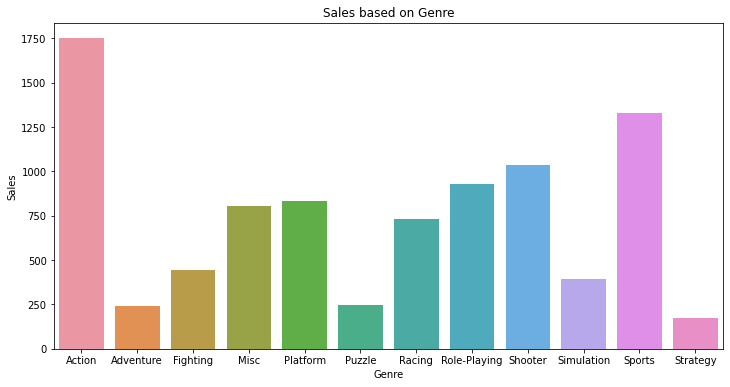

In [ ]:
#Graph showing best Selling genre
sale_by_genre = game_data.groupby('Genre')['Global_Sales'].sum()

plt.figure(figsize=(12,6))
sns.barplot(x = sale_by_genre.index, y = sale_by_genre)
plt.ylabel("Sales")
plt.title("Sales based on Genre")

Text(0.5, 1.0, 'Sales by Platform')

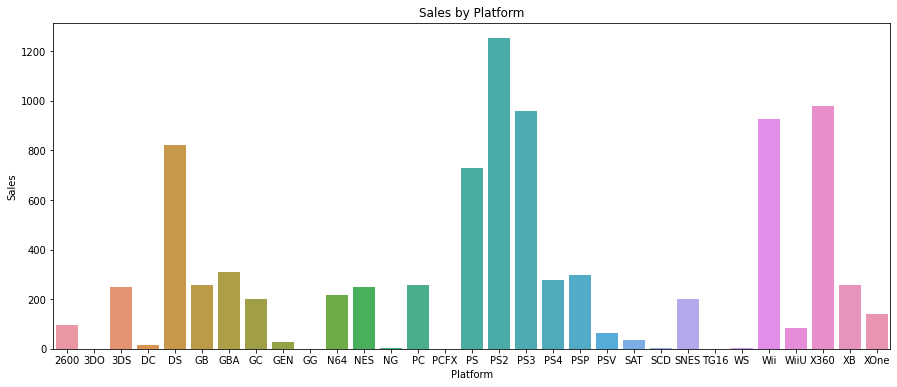

In [ ]:
#graph showing leading platform sales

sales_by_platform = game_data.groupby('Platform')['Global_Sales'].sum()

plt.figure(figsize=(15,6))

sns.barplot(x= sales_by_platform.index, y = sales_by_platform)
plt.ylabel("Sales")
plt.title("Sales by Platform")

In [ ]:
#Changing Columns to numrical value so our machine understands.
le = LabelEncoder()

game_data['Name'] = le.fit_transform(game_data['Name'])
game_data['Platform'] = le.fit_transform(game_data['Platform'])
game_data['Genre'] = le.fit_transform(game_data['Genre'])
game_data['Publisher'] = le.fit_transform(game_data['Publisher'])````````````````````````````````````````````````````

In [ ]:
#cleaning data by dropping unnecessary columns
X = game_data.drop(columns=['Global_Sales', 'JP_Sales', 'Other_Sales'])
y = game_data['Global_Sales']

#Train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

#Creation of linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
y_test = np.array(y_test)

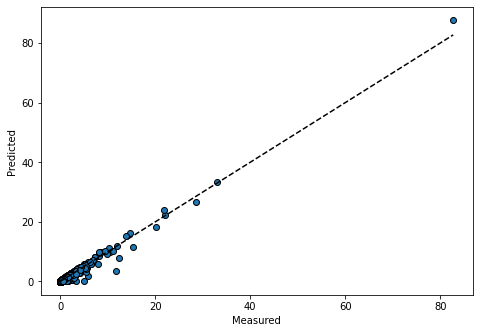

In [ ]:
#plot the scatter plot of values predicted against actual values.
ax = plt.axes([0, 0.6, 1, 1])
ax.scatter(y_test, predictions, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
arr = np.stack((y_test, predictions), axis=1)
columns = ['Actual', 'Predicted']
predicted_actual_dataFrame = pd.DataFrame(data=arr, columns=columns)

predicted_actual_dataFrame.head(10)

,Actual,Predicted
0,0.51,0.650645
1,1.72,0.980857
2,0.07,0.149760
3,0.14,0.212697
4,0.19,0.295533
5,0.14,0.053120
6,0.05,-0.024737
7,0.26,0.401240
8,0.51,0.522085
9,0.07,0.116091


In [ ]:
#predicting model score from skLearn
def model_score(model, model_name='Model Name'):
    print(f'Score of {model_name} Model: {model.score(X_test, y_test) * 100}%')

model_score(model, 'Linear Regression')

Score of Linear Regression Model: 97.53893666098593%
